In [3]:
import pandas as pd
import numpy as np

C:\Users\divya\AppData\Local\Temp\ipykernel_18192\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
data = pd.read_excel(r"C:\Users\divya\Downloads\FMT_Number of suicides.xlsx")

In [5]:
# Check the unique values for 'Country' and 'Year' to understand the scope of the data
countries = data['Country'].unique()
years = data['Year'].unique()
(countries, years)


(array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
        'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
        'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
        'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
        'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
        'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
        'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
        'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
        'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
        'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
        'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
        'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
        'Guatemala', 'Guinea', 'Guinea-Bissau', 'Gu

In [6]:
# Filter data for India and calculate average suicide rates
india_data = data[data['Country'] == 'India']
global_data = data[data['Country'] != 'India']

# Calculate average suicide rates per year for India
india_average_male = india_data.groupby('Year')['Age-standardized suicide rate - Sex: male'].mean()
india_average_female = india_data.groupby('Year')['Age-standardized suicide rate - Sex: female'].mean()

# Calculate average suicide rates per year for the rest of the world
global_average_male = global_data.groupby('Year')['Age-standardized suicide rate - Sex: male'].mean()
global_average_female = global_data.groupby('Year')['Age-standardized suicide rate - Sex: female'].mean()

# Prepare a DataFrame to plot
average_suicide_rates = pd.DataFrame({
    'India - Male': india_average_male,
    'India - Female': india_average_female,
    'Global - Male': global_average_male,
    'Global - Female': global_average_female
})

average_suicide_rates.reset_index(inplace=True)
average_suicide_rates.head()


,Year,India - Male,India - Female,Global - Male,Global - Female
0,2000,20.9008,17.3555,21.036951,6.108491
1,2001,20.5805,16.8522,20.615558,5.928322
2,2002,20.4283,15.9459,20.378652,5.873606
3,2003,19.7378,14.8089,20.041552,5.806590
4,2004,19.4892,14.1637,19.777585,5.738536


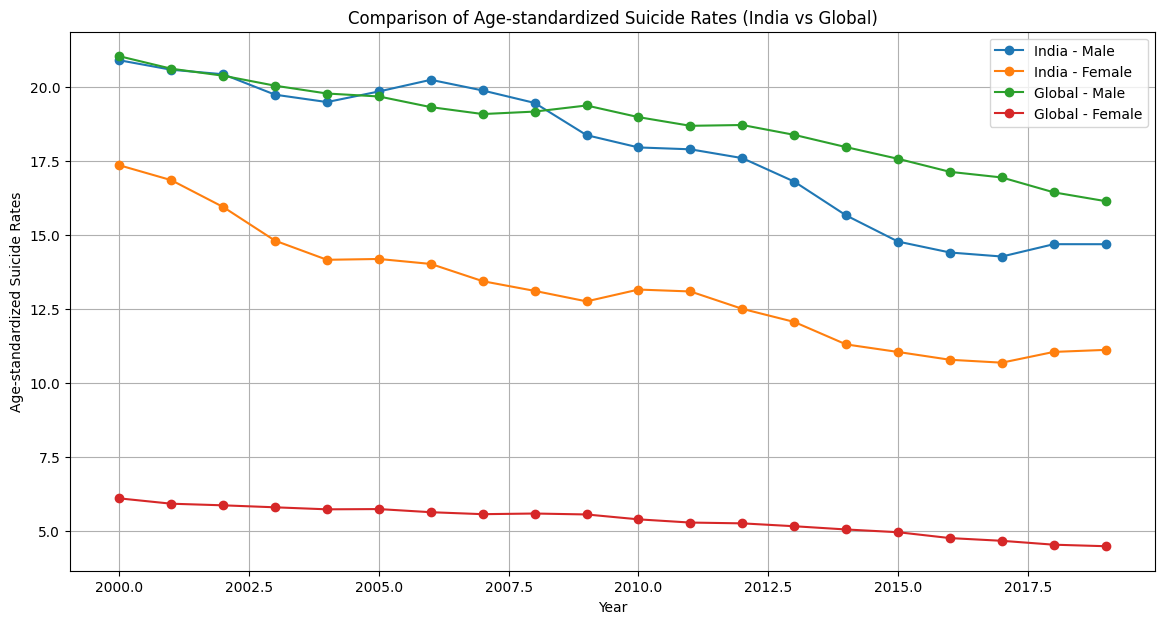

In [7]:
import matplotlib.pyplot as plt

# Plotting the trends
plt.figure(figsize=(14, 7))

plt.plot(average_suicide_rates['Year'], average_suicide_rates['India - Male'], label='India - Male', marker='o')
plt.plot(average_suicide_rates['Year'], average_suicide_rates['India - Female'], label='India - Female', marker='o')
plt.plot(average_suicide_rates['Year'], average_suicide_rates['Global - Male'], label='Global - Male', marker='o')
plt.plot(average_suicide_rates['Year'], average_suicide_rates['Global - Female'], label='Global - Female', marker='o')

plt.title('Comparison of Age-standardized Suicide Rates (India vs Global)')
plt.xlabel('Year')
plt.ylabel('Age-standardized Suicide Rates')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Initialize and fit exponential smoothing models
def apply_exponential_smoothing(series):
    model = SimpleExpSmoothing(series)
    fitted_model = model.fit(smoothing_level=0.2, optimized=False)
    return fitted_model

# Apply exponential smoothing for each series
india_male_model = apply_exponential_smoothing(average_suicide_rates['India - Male'])
india_female_model = apply_exponential_smoothing(average_suicide_rates['India - Female'])
global_male_model = apply_exponential_smoothing(average_suicide_rates['Global - Male'])
global_female_model = apply_exponential_smoothing(average_suicide_rates['Global - Female'])

# Forecast next 5 years
forecast_years = 5
india_male_forecast = india_male_model.forecast(forecast_years)
india_female_forecast = india_female_model.forecast(forecast_years)
global_male_forecast = global_male_model.forecast(forecast_years)
global_female_forecast = global_female_model.forecast(forecast_years)

# Collect forecasts into a DataFrame
forecast_index = range(2020, 2020 + forecast_years)
forecast_data = pd.DataFrame({
    'Year': forecast_index,
    'Forecast India - Male': india_male_forecast,
    'Forecast India - Female': india_female_forecast,
    'Forecast Global - Male': global_male_forecast,
    'Forecast Global - Female': global_female_forecast
})

forecast_data


,Year,Forecast India - Male,Forecast India - Female,Forecast Global - Male,Forecast Global - Female
20,2020,15.644542,11.590865,17.398887,4.878697
21,2021,15.644542,11.590865,17.398887,4.878697
22,2022,15.644542,11.590865,17.398887,4.878697
23,2023,15.644542,11.590865,17.398887,4.878697
24,2024,15.644542,11.590865,17.398887,4.878697


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to calculate error metrics
def calculate_error_metrics(actual, fitted):
    mse = mean_squared_error(actual, fitted)
    mae = mean_absolute_error(actual, fitted)
    rmse = mse ** 0.5
    return mse, mae, rmse

# Extract fitted values
india_male_fitted = india_male_model.fittedvalues
india_female_fitted = india_female_model.fittedvalues
global_male_fitted = global_male_model.fittedvalues
global_female_fitted = global_female_model.fittedvalues

# Calculate error metrics for India - Male
india_male_mse, india_male_mae, india_male_rmse = calculate_error_metrics(average_suicide_rates['India - Male'], india_male_fitted)

# Calculate error metrics for India - Female
india_female_mse, india_female_mae, india_female_rmse = calculate_error_metrics(average_suicide_rates['India - Female'], india_female_fitted)

# Calculate error metrics for Global - Male
global_male_mse, global_male_mae, global_male_rmse = calculate_error_metrics(average_suicide_rates['Global - Male'], global_male_fitted)

# Calculate error metrics for Global - Female
global_female_mse, global_female_mae, global_female_rmse = calculate_error_metrics(average_suicide_rates['Global - Female'], global_female_fitted)

# Collecting error metrics into a DataFrame for better visualization
error_metrics = pd.DataFrame({
    "Metric": ["MSE", "MAE", "RMSE"],
    "India - Male": [india_male_mse, india_male_mae, india_male_rmse],
    "India - Female": [india_female_mse, india_female_mae, india_female_rmse],
    "Global - Male": [global_male_mse, global_male_mae, global_male_rmse],
    "Global - Female": [global_female_mse, global_female_mae, global_female_rmse]
})

error_metrics


,Metric,India - Male,India - Female,Global - Male,Global - Female
0,MSE,2.552932,2.441701,0.987328,0.112890
1,MAE,1.314065,1.441159,0.909516,0.307448
2,RMSE,1.597790,1.562594,0.993644,0.335992
